#Data Cleaning

#Data Cleaning

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [201]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [202]:
import sys
import os

# Add the project root to sys.path (adjust the path as needed)
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))
sys.path.append(project_root)

# Now try to import the DataIngestion class
from src.components.data_ingestion import DataIngestion

# Initialize the DataIngestion object
ingestion = DataIngestion()

# Load data from the database
df_city_weather = ingestion.load_dataframe('city_weather')
df_drivers = ingestion.load_dataframe('drivers_table')
df_routes = ingestion.load_dataframe('routes_table')
df_routes_weather  = ingestion.load_dataframe('routes_weather')
df_traffic = ingestion.load_dataframe('traffic_table')
df_truck_schedule = ingestion.load_dataframe('truck_schedule_table')
df_trucks = ingestion.load_dataframe('trucks_table')


# Display the data
print(df_drivers.head())
print(df_routes.head())


Connected to database: postgres
    driver_id               name gender  age  experience driving_style  \
0  d9f30553-6       Daniel Marks   male   47           5     proactive   
1  82de7bb8-2      Clifford Carr   male   47          14     proactive   
2  7e789842-4  Terry Faulkner MD   male   41           9  conservative   
3  b2555587-8     Brendan Jacobs   male   44          10     proactive   
4  b2e58421-d      Vincent Davis   male   41          10     proactive   

   ratings  vehicle_no  average_speed_mph  
0        7    42302347              62.22  
1        4    27867488              60.89  
2        2    13927774              53.67  
3        2    69577118              59.82  
4        7    28650047              62.65  
     route_id   origin_id destination_id  distance  average_hours
0  R-ada2a391  C-927ceb5e     C-56e39a5e   1735.06          34.70
1  R-ae0ef31f  C-927ceb5e     C-73ae5412   1498.24          29.96
2  R-4beec5fd  C-927ceb5e     C-4fe0fa24   6078.46         12

In [203]:
df1 = df_city_weather 

In [204]:
df1.shape

(55176, 14)

In [205]:
#understanding the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55176 entries, 0 to 55175
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_id          55176 non-null  object 
 1   date             55176 non-null  object 
 2   hour             55176 non-null  int64  
 3   temp             55176 non-null  int64  
 4   wind_speed       55176 non-null  int64  
 5   description      55176 non-null  object 
 6   precip           55176 non-null  float64
 7   humidity         55176 non-null  int64  
 8   visibility       55176 non-null  int64  
 9   pressure         55176 non-null  int64  
 10  chanceofrain     55176 non-null  int64  
 11  chanceoffog      55176 non-null  int64  
 12  chanceofsnow     55176 non-null  int64  
 13  chanceofthunder  55176 non-null  int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 5.9+ MB


In [206]:
df1.head()

,city_id,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
0,C-927ceb5e,2019-01-01,0,30,11,Light snow,0.0,86,6,1019,0,0,0,0
1,C-927ceb5e,2019-01-01,100,28,12,Light snow,0.0,86,5,1021,0,0,0,0
2,C-927ceb5e,2019-01-01,200,28,13,Moderate snow,0.0,85,4,1022,0,0,0,0
3,C-927ceb5e,2019-01-01,300,28,14,Moderate snow,0.0,84,3,1024,0,0,0,0
4,C-927ceb5e,2019-01-01,400,28,13,Moderate snow,0.0,84,3,1025,0,0,0,0


In [207]:
#stats of the data
df1.describe()

,hour,temp,wind_speed,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
count,55176.000000,55176.000000,55176.000000,55176.000000,55176.000000,55176.000000,55176.000000,55176.0,55176.0,55176.0,55176.0
mean,1150.000000,36.896169,7.888647,0.003614,70.808141,5.168878,1019.413404,0.0,0.0,0.0,0.0
std,692.224928,21.766273,4.349798,0.023185,21.078367,1.639954,8.543195,0.0,0.0,0.0,0.0
min,0.000000,-35.000000,0.000000,0.000000,3.000000,0.000000,988.000000,0.0,0.0,0.0,0.0
25%,575.000000,23.000000,5.000000,0.000000,57.000000,6.000000,1014.000000,0.0,0.0,0.0,0.0
50%,1150.000000,34.000000,7.000000,0.000000,75.000000,6.000000,1019.000000,0.0,0.0,0.0,0.0
75%,1725.000000,48.000000,11.000000,0.000000,88.000000,6.000000,1025.000000,0.0,0.0,0.0,0.0
max,2300.000000,104.000000,33.000000,0.800000,100.000000,6.000000,1049.000000,0.0,0.0,0.0,0.0


In [208]:
#Step 2: Handling the missing data

In [209]:
print(df1.isnull().sum())

city_id            0
date               0
hour               0
temp               0
wind_speed         0
description        0
precip             0
humidity           0
visibility         0
pressure           0
chanceofrain       0
chanceoffog        0
chanceofsnow       0
chanceofthunder    0
dtype: int64


Hence as per our observation there are no null values in the city weather dataset

#Understanding if there are any duplicate values

In [210]:
df1.duplicated().sum()

0

Hence as per our observation there are no duplicates in the city weather dataset

array([[<Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'wind_speed'}>],
       [<Axes: title={'center': 'precip'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'visibility'}>],
       [<Axes: title={'center': 'pressure'}>,
        <Axes: title={'center': 'chanceofrain'}>,
        <Axes: title={'center': 'chanceoffog'}>],
       [<Axes: title={'center': 'chanceofsnow'}>,
        <Axes: title={'center': 'chanceofthunder'}>, <Axes: >]],
      dtype=object)

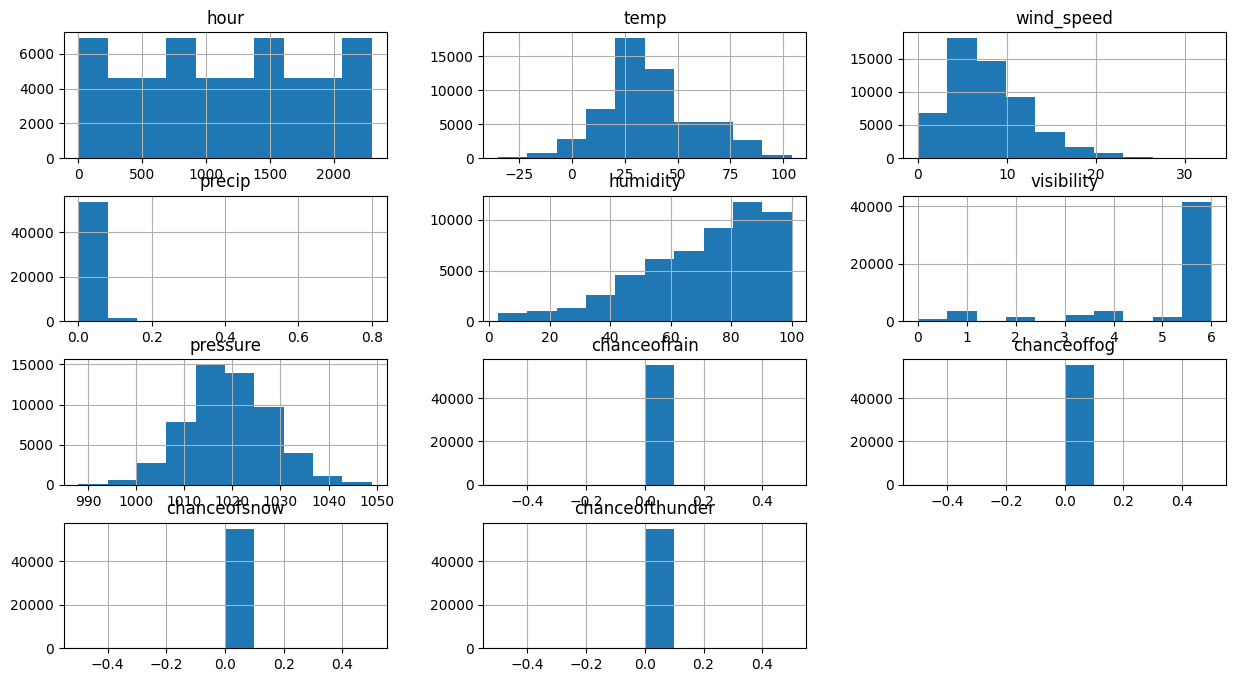

In [211]:
#Understanding the data
df1.hist(figsize=(15,8))

The following methods are used for outlier removal
IQR Method: Good for skewed distributions.
Z-Score Method: Ideal when data is normally distributed.
Percentile-Based Filtering: Flexible and doesn't assume normality.
Standard Deviation Method: Assumes data follows a Gaussian distribution
 
Here we use the IQR method for skewed distribution

In [212]:
df1.columns

Index(['city_id', 'date', 'hour', 'temp', 'wind_speed', 'description',
       'precip', 'humidity', 'visibility', 'pressure', 'chanceofrain',
       'chanceoffog', 'chanceofsnow', 'chanceofthunder'],
      dtype='object')

In [213]:
#dropping the columns with zero as values

In [214]:
df1=df1.drop(labels=None, axis=1, columns=['chanceofrain','chanceoffog','chanceofsnow','chanceofthunder'], inplace=False)

In [215]:
df1

,city_id,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure
0,C-927ceb5e,2019-01-01,0,30,11,Light snow,0.0,86,6,1019
1,C-927ceb5e,2019-01-01,100,28,12,Light snow,0.0,86,5,1021
2,C-927ceb5e,2019-01-01,200,28,13,Moderate snow,0.0,85,4,1022
3,C-927ceb5e,2019-01-01,300,28,14,Moderate snow,0.0,84,3,1024
4,C-927ceb5e,2019-01-01,400,28,13,Moderate snow,0.0,84,3,1025
...,...,...,...,...,...,...,...,...,...,...
55171,C-594514f8,2019-02-15,1900,23,3,Cloudy,0.0,74,6,1018
55172,C-594514f8,2019-02-15,2000,23,3,Light snow,0.0,74,6,1018
55173,C-594514f8,2019-02-15,2100,23,3,Light snow,0.0,75,6,1019
55174,C-594514f8,2019-02-15,2200,23,2,Light snow,0.0,75,6,1019


In [216]:
df1.columns

Index(['city_id', 'date', 'hour', 'temp', 'wind_speed', 'description',
       'precip', 'humidity', 'visibility', 'pressure'],
      dtype='object')

In [217]:
columns = df1.columns

# Function to remove outliers using IQR method

In [218]:
# Columns from where outliers need to be removed
columns_to_check = ['temp', 'wind_speed', 'precip', 'humidity', 'visibility', 'pressure']

# Function to remove outliers using IQR method
def remove_outliers_iqr(df1, columns):
    df_cleaned = df1.copy()  # Create a copy of the DataFrame to avoid modifying the original
    for column in columns:
        Q1 = df_cleaned[column].quantile(0.25)  # 25th percentile (1st Quartile)
        Q3 = df_cleaned[column].quantile(0.75)  # 75th percentile (3rd Quartile)
        IQR = Q3 - Q1  # Interquartile Range
        
        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out rows with outliers
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned

# Apply the function to remove outliers from the specified columns
df_cleaned = remove_outliers_iqr(df1, columns_to_check)

# Display the cleaned DataFrame
print(df_cleaned)

          city_id        date  hour  temp  wind_speed description  precip  \
0      C-927ceb5e  2019-01-01     0    30          11  Light snow     0.0   
9      C-927ceb5e  2019-01-01   900    25          13  Light snow     0.0   
10     C-927ceb5e  2019-01-01  1000    27          13  Light snow     0.0   
11     C-927ceb5e  2019-01-01  1100    27          13  Light snow     0.0   
12     C-927ceb5e  2019-01-01  1200    27          14  Light snow     0.0   
...           ...         ...   ...   ...         ...         ...     ...   
55171  C-594514f8  2019-02-15  1900    23           3      Cloudy     0.0   
55172  C-594514f8  2019-02-15  2000    23           3  Light snow     0.0   
55173  C-594514f8  2019-02-15  2100    23           3  Light snow     0.0   
55174  C-594514f8  2019-02-15  2200    23           2  Light snow     0.0   
55175  C-594514f8  2019-02-15  2300    23           2  Light snow     0.0   

       humidity  visibility  pressure  
0            86           6      10

Hence the outliers were removed and the data reduced to 38,840 rows from 55,176 rows

2. Data Preparation: Preparing the dataset for ML model training by handling feature selection, feature engineering, and encoding.

In [219]:
df_cleaned

,city_id,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure
0,C-927ceb5e,2019-01-01,0,30,11,Light snow,0.0,86,6,1019
9,C-927ceb5e,2019-01-01,900,25,13,Light snow,0.0,83,6,1029
10,C-927ceb5e,2019-01-01,1000,27,13,Light snow,0.0,82,6,1029
11,C-927ceb5e,2019-01-01,1100,27,13,Light snow,0.0,81,6,1029
12,C-927ceb5e,2019-01-01,1200,27,14,Light snow,0.0,80,6,1029
...,...,...,...,...,...,...,...,...,...,...
55171,C-594514f8,2019-02-15,1900,23,3,Cloudy,0.0,74,6,1018
55172,C-594514f8,2019-02-15,2000,23,3,Light snow,0.0,74,6,1018
55173,C-594514f8,2019-02-15,2100,23,3,Light snow,0.0,75,6,1019
55174,C-594514f8,2019-02-15,2200,23,2,Light snow,0.0,75,6,1019


In [220]:
df=df_cleaned

In [221]:
df1['city_id'].value_counts().count()

49

In [222]:
df1['date'].value_counts().count()

46

In [223]:
df1['description'].value_counts().count()

47

In [224]:
df.columns

Index(['city_id', 'date', 'hour', 'temp', 'wind_speed', 'description',
       'precip', 'humidity', 'visibility', 'pressure'],
      dtype='object')

checking the value counts for each column

In [225]:
df['hour'].value_counts().count()

24

In [226]:
df['temp'].value_counts().count()

55

In [227]:
df['wind_speed'].value_counts().count()

21

In [228]:
df['precip'].value_counts().count()

1

In [229]:
df['precip'].value_counts()

precip
0.0    38840
Name: count, dtype: int64

In [230]:
df['humidity'].value_counts().count()

88

In [231]:
df['visibility'].value_counts().count()

1

In [232]:
df['description'].value_counts()

description
Clear                                  9682
Partly cloudy                          8974
Sunny                                  8737
Overcast                               4229
Cloudy                                 3254
Light snow                             1273
Patchy rain possible                    752
Light rain shower                       598
Light rain                              471
Patchy light snow                       401
Light sleet                             107
Patchy snow possible                     87
Patchy light rain                        69
Ice pellets                              39
Thundery outbreaks possible              30
Light snow showers                       29
Moderate rain at times                   19
Patchy light rain with thunder           18
Patchy sleet possible                    12
Moderate snow                            12
Light freezing rain                      10
Moderate rain                             8
Moderate or heavy ra

In [233]:
df['pressure'].value_counts().count()

44

In [234]:
# Adding a new index column with a different name
df1.insert(0, 'RowIndex', range(1, 1 + len(df1)))

# Display the DataFrame with the new index column
print(df1)

       RowIndex     city_id        date  hour  temp  wind_speed  \
0             1  C-927ceb5e  2019-01-01     0    30          11   
1             2  C-927ceb5e  2019-01-01   100    28          12   
2             3  C-927ceb5e  2019-01-01   200    28          13   
3             4  C-927ceb5e  2019-01-01   300    28          14   
4             5  C-927ceb5e  2019-01-01   400    28          13   
...         ...         ...         ...   ...   ...         ...   
55171     55172  C-594514f8  2019-02-15  1900    23           3   
55172     55173  C-594514f8  2019-02-15  2000    23           3   
55173     55174  C-594514f8  2019-02-15  2100    23           3   
55174     55175  C-594514f8  2019-02-15  2200    23           2   
55175     55176  C-594514f8  2019-02-15  2300    23           2   

         description  precip  humidity  visibility  pressure  
0         Light snow     0.0        86           6      1019  
1         Light snow     0.0        86           5      1021  
2     

In [235]:
df1['event_time']= pd.to_datetime('2024-09-17')

In [236]:
df = df1

In [237]:
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['hour'].apply(lambda x: f"{x // 100:02}:{x % 100:02}:00")
df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['hour'])
df = df.drop(columns=['date', 'hour'])
  

In [238]:
df.dtypes


RowIndex                int64
city_id                object
temp                    int64
wind_speed              int64
description            object
precip                float64
humidity                int64
visibility              int64
pressure                int64
event_time     datetime64[ns]
datetime       datetime64[ns]
dtype: object

In [239]:
df

,RowIndex,city_id,temp,wind_speed,description,precip,humidity,visibility,pressure,event_time,datetime
0,1,C-927ceb5e,30,11,Light snow,0.0,86,6,1019,2024-09-17,2019-01-01 00:00:00
1,2,C-927ceb5e,28,12,Light snow,0.0,86,5,1021,2024-09-17,2019-01-01 01:00:00
2,3,C-927ceb5e,28,13,Moderate snow,0.0,85,4,1022,2024-09-17,2019-01-01 02:00:00
3,4,C-927ceb5e,28,14,Moderate snow,0.0,84,3,1024,2024-09-17,2019-01-01 03:00:00
4,5,C-927ceb5e,28,13,Moderate snow,0.0,84,3,1025,2024-09-17,2019-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...
55171,55172,C-594514f8,23,3,Cloudy,0.0,74,6,1018,2024-09-17,2019-02-15 19:00:00
55172,55173,C-594514f8,23,3,Light snow,0.0,74,6,1018,2024-09-17,2019-02-15 20:00:00
55173,55174,C-594514f8,23,3,Light snow,0.0,75,6,1019,2024-09-17,2019-02-15 21:00:00
55174,55175,C-594514f8,23,2,Light snow,0.0,75,6,1019,2024-09-17,2019-02-15 22:00:00


In [240]:
df1 = df

In [ ]:
##feature group

##featuregroup

In [241]:
!pip install hopsworks


In [242]:
import hopsworks

project = hopsworks.login()

fs = project.get_feature_store()

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1043610
Connected. Call `.close()` to terminate connection gracefully.


In [243]:
city_weather_fg = fs.get_or_create_feature_group(
    name="city_weather",
    version=1,
    description="city_weather",
    online_enabled=True,
    primary_key=['rowindex'],
    event_time='event_time',
    
)

In [245]:
# Attempt to insert the DataFrame into the feature store again
city_weather_fg.insert(df)

FeatureStoreException: Features are not compatible with Feature Group schema: 
 - date (type: 'timestamp') is missing from input dataframe.
 - chanceofrain (type: 'bigint') is missing from input dataframe.
 - chanceoffog (type: 'bigint') is missing from input dataframe.
 - chanceofsnow (type: 'bigint') is missing from input dataframe.
 - chanceofthunder (type: 'bigint') is missing from input dataframe.
 - eventtime (type: 'timestamp') is missing from input dataframe.
 - datetime (type: 'timestamp') does not exist in feature group.
Note that feature (or column) names are case insensitive and spaces are automatically replaced with underscores.

In [ ]:

# # Rename 'datetime' column to 'date' if necessary
# df1.rename(columns={'datetime': 'date'}, inplace=True)

# # Convert 'date' column to timestamp if it's not already
# df1['date'] = pd.to_datetime(df1['date'])



Data Analysis

In [175]:
pip install hopsworks

Note: you may need to restart the kernel to use updated packages.


In [176]:
pip install hsfs

Note: you may need to restart the kernel to use updated packages.


In [177]:
import hsfs

# Set up your API key for Hopsworks
api_key = "dRzrIhSDhpZjLQCd.ZLlcViwwQqM7IDTQwTVfaJqrxxS4vqCjGIVMrysEcmFocLbAuMHTAXbF0ona7QzB"

# Set your project name
project_name = "Your_Project_Name"  # Replace with your project name

# Initialize connection to Hopsworks
connection = hsfs.connection(
    host="c.app.hopsworks.ai",  # Hopsworks host
    port=443,                   # Default port for Hopsworks
    project=project_name,        # Your Hopsworks project name
    api_key_value=api_key,       # Your API key
    hostname_verification=False  # Optional: Turn off SSL verification
)

# Get the feature store for your project
fs = connection.get_feature_store()

# Print the feature store details
print(f"Feature Store Name: {fs.name}")


Connected. Call `.close()` to terminate connection gracefully.
Feature Store Name: truckdelays_pipelines_featurestore


In [178]:
# Corrected code to read the feature group using Hive
import hopsworks

# Initialize connection to Hopsworks
connection = hopsworks.login(
    api_key_value="dRzrIhSDhpZjLQCd.ZLlcViwwQqM7IDTQwTVfaJqrxxS4vqCjGIVMrysEcmFocLbAuMHTAXbF0ona7QzB"
)

# Get feature store
fs = connection.get_feature_store()

# Get the feature group
feature_group = fs.get_feature_group(name="city_weather", version=1)

# Load the feature group into a pandas DataFrame using Hive
df = feature_group.read(read_options={"use_hive": True})

# Print the DataFrame to verify the data
print(df)


Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1043610
Connected. Call `.close()` to terminate connection gracefully.
2024-09-27 13:07:48,567 WARNING: DeprecationWarning: ssl.PROTOCOL_TLS is deprecated

Finished: Reading data from Hopsworks, using Hive (4.64s) 
       rowindex     city_id  temp  wind_speed    description  precip  \
0          4592  C-451776b7    61           1          Sunny     0.0   
1         12379  C-ef47bdcd    41           4  Partly cloudy     0.0   
2          8297  C-731988ba    73           4          Sunny     0.0   
3         42087  C-d9e9d934    45           6  Partly cloudy     0.0   
4           165  C-927ceb5e    43           6  Partly cloudy     0.0   
...         ...         ...   ...         ...            ...     ...   
55171     11817  C-c7cacd1d    16          11         Cloudy     0.0   
55172     26108  C-f5ed4c15    10           2  Partly c

Plotting the histogram for the numerical columns

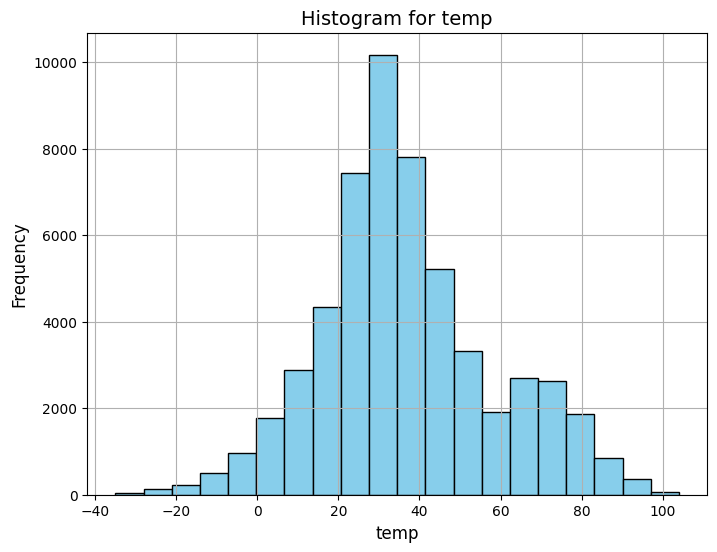

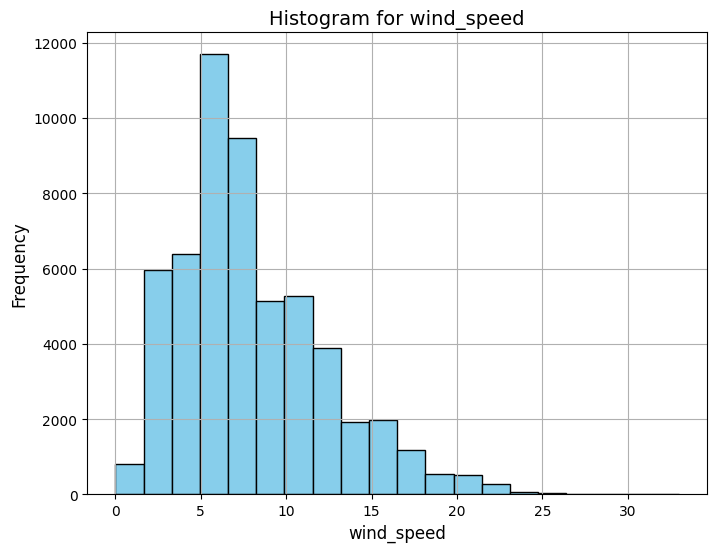

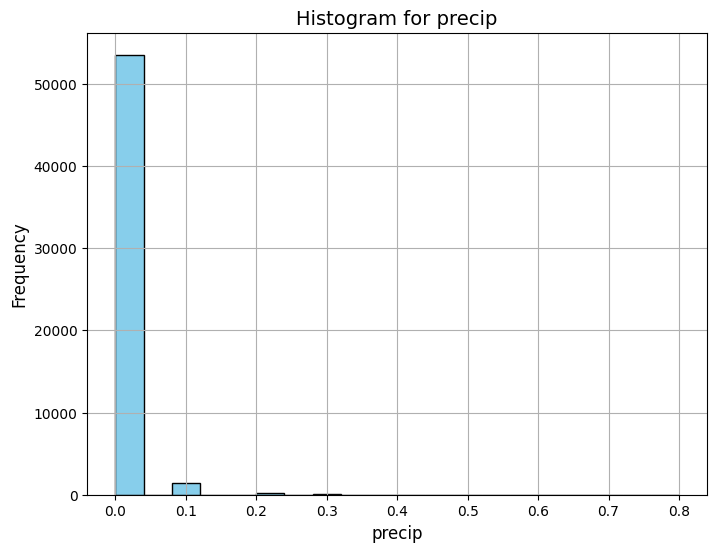

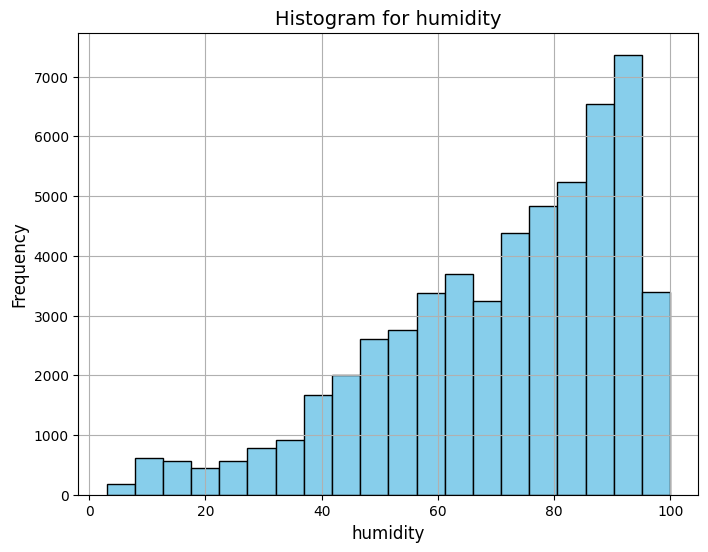

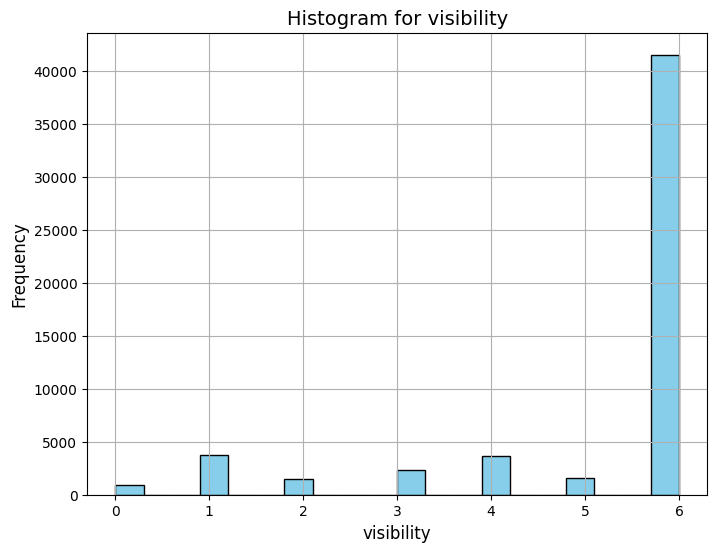

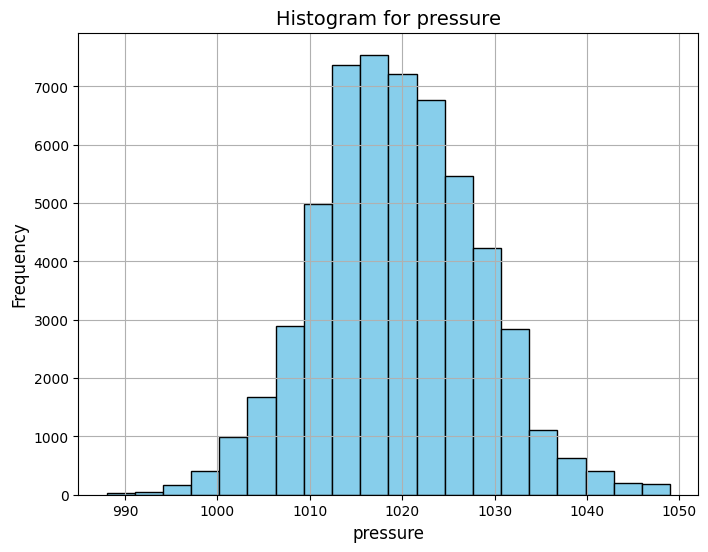

In [179]:
# List of columns for which you want to plot histograms
columns_to_plot = ['temp', 'wind_speed', 'precip','humidity','visibility','pressure']

def plot_histograms(dataframe, columns):
    """
    Function to plot histograms for specific columns in the DataFrame.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the data.
    columns (list): List of column names to generate histograms for.
    """
    # Loop through the list of columns and generate a histogram for each
    for column in columns:
        if column in dataframe.columns:
            plt.figure(figsize=(8, 6))  # Set the figure size
            plt.hist(dataframe[column].dropna(), bins=20, color='skyblue', edgecolor='black')  # Plot the histogram
            plt.title(f'Histogram for {column}', fontsize=14)  # Set title
            plt.xlabel(column, fontsize=12)  # X-axis label
            plt.ylabel('Frequency', fontsize=12)  # Y-axis label
            plt.grid(True)  # Enable grid
            plt.show()  # Display the plot
        else:
            print(f"Column {column} does not exist in the DataFrame.")

# Call the function to plot histograms
plot_histograms(df, columns_to_plot)

Hence the data for preciptation is more of a singular data with only single value of 0.
 

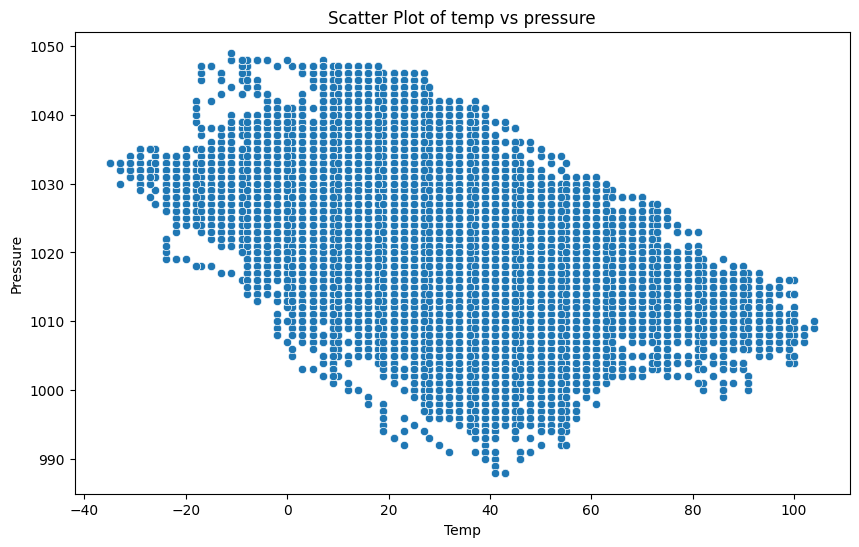

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns


# Specify the columns you want to plot
x_column = 'temp'  # Replace with your actual x-axis column
y_column = 'pressure'  # Replace with your actual y-axis column

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[x_column], y=df[y_column])

# Add labels and title
plt.xlabel(x_column.capitalize())
plt.ylabel(y_column.capitalize())
plt.title(f'Scatter Plot of {x_column} vs {y_column}')

# Display the plot
plt.show()


In [184]:
df.columns
columns_to_plot = ['temp', 'wind_speed', 'precip','humidity','visibility','pressure']  # Replace with your actual column names


Index(['rowindex', 'city_id', 'temp', 'wind_speed', 'description', 'precip',
       'humidity', 'visibility', 'pressure', 'event_time', 'date'],
      dtype='object')

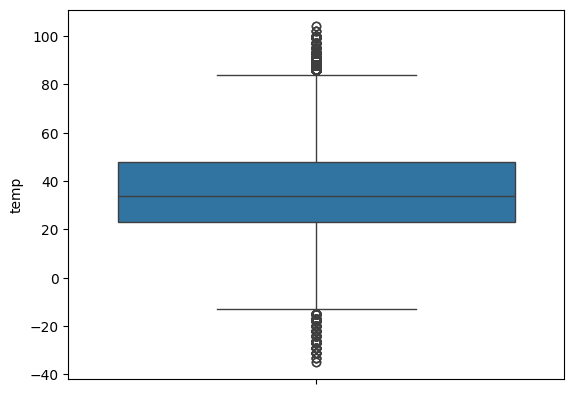

In [189]:
# List of column names to plot
sns.boxplot(y=df['temp'])
    # Show the plot
plt.show()

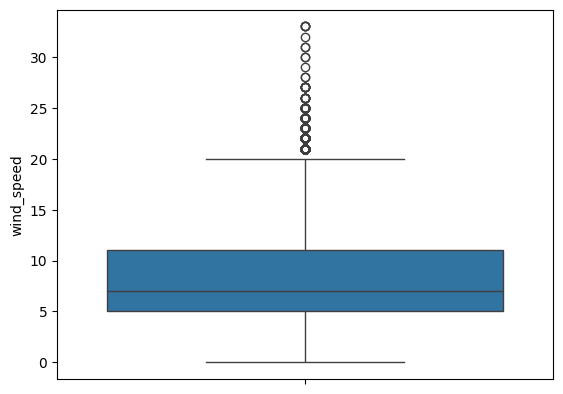

In [190]:
sns.boxplot(y=df['wind_speed'])
    # Show the plot
plt.show()

<Axes: ylabel='precip'>

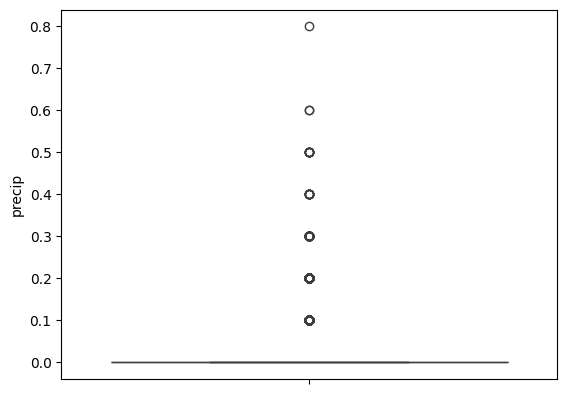

In [192]:
sns.boxplot(y=df['precip'])


<Axes: ylabel='humidity'>

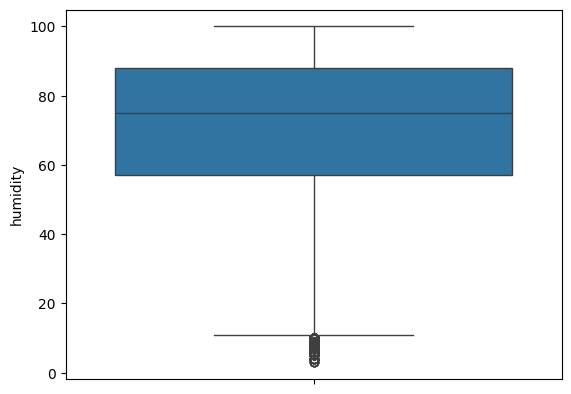

In [246]:
sns.boxplot(y=df['humidity'])


<Axes: ylabel='visibility'>

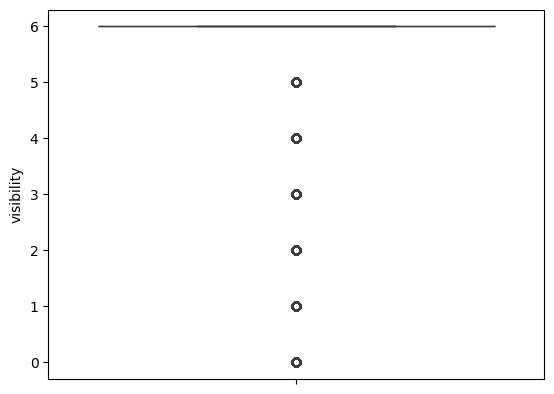

In [193]:
sns.boxplot(y=df['visibility'])

<Axes: ylabel='pressure'>

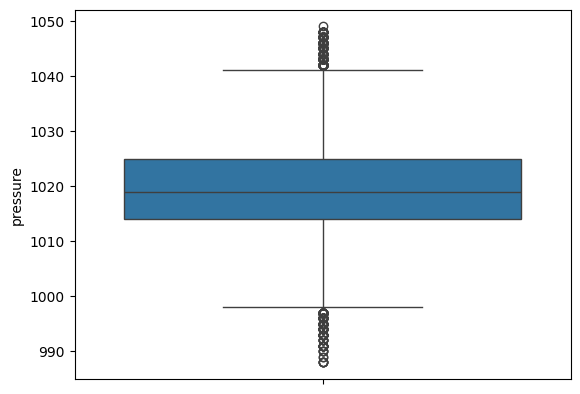

In [194]:
sns.boxplot(y=df['pressure'])

In [249]:
import hopsworks

project=hopsworks.login(api_key_value='dRzrIhSDhpZjLQCd.ZLlcViwwQqM7IDTQwTVfaJqrxxS4vqCjGIVMrysEcmFocLbAuMHTAXbF0ona7QzB')

fs=project.get_feature_store()

feature_group=fs.get_feature_group('routes_table')

feature_group.delete()



Connection closed.
Connected. Call `.close()` to terminate connection gracefully.



Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1043610
Connected. Call `.close()` to terminate connection gracefully.
2024-09-30 12:35:44,479 WARNING: VersionWarning: No version provided for getting feature group `routes_table`, defaulting to `1`.



RestAPIError: Metadata operation error: (url: https://c.app.hopsworks.ai/hopsworks-api/api/project/1043610/featurestores/1035337/featuregroups/routes_table). Server response: 
HTTP code: 500, HTTP reason: Internal Server Error, body: b'{"errorCode":270116,"usrMsg":"Error getting feature group table from Hive Metastore: hive.truckdelays_pipelines_featurestore.routes_table_1 table not found","devMsg":"hive.truckdelays_pipelines_featurestore.routes_table_1 table not found","errorMsg":"Failed to retrieve feature group meta data"}', error code: 270116, error msg: Failed to retrieve feature group meta data, user msg: Error getting feature group table from Hive Metastore: hive.truckdelays_pipelines_featurestore.routes_table_1 table not found